In [102]:
# loop through all the files in ouptut directory and create dataframes for them
import pandas as pd
import os

# get the current working directory
cwd = os.getcwd()
# get the output directory
output_dir = os.path.join(cwd, 'output')
# get the list of files in the output directory
files = os.listdir(output_dir)

dfs = {}

# loop through the files and create dataframes
for file in files:
    # get the file path
    file_path = os.path.join(output_dir, file)
    # read the file
    df = pd.read_csv(file_path)
    # append the dataframe to the list
    dfs[file] = df

    # print the first 5 rows of the dataframe
    print(df.head())
    print('\n\n')

   bus_id            timestamp      load stop  time_on_route  time_waiting  \
0    4895  2024-10-31 14:24:00  0.179104  NaN              0             0   
1    4895  2024-10-31 14:24:31  0.179104  NaN            885             0   
2    4895  2024-10-31 14:25:01  0.179104  NaN            855             0   
3    4895  2024-10-31 14:25:32  0.179104  NaN            824             0   
4    4895  2024-10-31 14:26:02  0.179104  NaN            794             0   

   time_to_complete  
0                 0  
1               122  
2                92  
3                61  
4                31  



   bus_id            timestamp      load                  stop  time_on_route  \
0   13216  2024-10-31 14:24:00  0.000000                   NaN              0   
1   13216  2024-10-31 14:24:31  0.000000                   NaN            885   
2   13216  2024-10-31 14:25:01  0.000000                   NaN            855   
3   13216  2024-10-31 14:25:32  0.044776  Busch Student Center          

In [ ]:
route = list(dfs.keys())[10]
route

In [606]:
dfs[route].head()

,bus_id,timestamp,load,stop,time_on_route,time_waiting,time_to_complete
0,4881,2024-10-31 14:24:00,0.283582,NaN,0,0,0
1,4881,2024-10-31 14:24:31,0.283582,NaN,1649,0,61
2,4881,2024-10-31 14:25:01,0.283582,NaN,1619,0,31
3,4881,2024-10-31 14:25:32,0.238806,Allison Road Classrooms,1588,61,0
4,4881,2024-10-31 14:26:02,0.343284,Allison Road Classrooms,1558,31,0


In [607]:
dfs[route]['bus_id'].unique()

array([ 4881,  7180,  9421, 11195,  4851, 13214, 13210, 15188,  4893,
        9418,  4855,  4864,  4856,  4895,  4862, 15186,  4875,  4890,
       17625,  4873,  4876,  4877, 11197], dtype=int64)

In [608]:
""" import matplotlib.pyplot as plt

# create graphs for the loop times for the buses
for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    plt.plot(data_bus['timestamp'], data_bus['time_on_route']/60)
    plt.title(f'Loop Time for {route} Bus {bus_id}')
    plt.xlabel('Time')
    plt.ylabel('Loop Time')
    plt.show()
 """

" import matplotlib.pyplot as plt\n\n# create graphs for the loop times for the buses\nfor bus_id in dfs[route]['bus_id'].unique():\n    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]\n\n    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])\n    data_bus = data_bus.sort_values(by='timestamp')\n\n    plt.plot(data_bus['timestamp'], data_bus['time_on_route']/60)\n    plt.title(f'Loop Time for {route} Bus {bus_id}')\n    plt.xlabel('Time')\n    plt.ylabel('Loop Time')\n    plt.show()\n "

In [609]:
# for each bus count the number of times the measurement jumps from 0 to something not equal to 0
# make a dictionary for each bus and a list with all the times

times = {}

for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    times[bus_id] = []

    for i in range(1, len(data_bus)):
        value = data_bus.iloc[i]['time_on_route']
        before = data_bus.iloc[i-1]['time_on_route']

        if before == 0 and value >= 600:
            times[bus_id].append(value / 60)

times

C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2742491858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

{4881: [27.483333333333334,
  33.11666666666667,
  42.36666666666667,
  38.833333333333336,
  45.016666666666666,
  30.2,
  33.3,
  16.933333333333334],
 7180: [31.566666666666666,
  40.28333333333333,
  30.116666666666667,
  36.8,
  34.78333333333333,
  30.216666666666665,
  34.35,
  31.8,
  32.85],
 9421: [31.566666666666666,
  38.25,
  43.36666666666667,
  30.133333333333333,
  40.4,
  29.183333333333334,
  31.766666666666666,
  33.333333333333336,
  25.15,
  29.766666666666666,
  27.733333333333334,
  29.3],
 11195: [14.25,
  28.016666666666666,
  40.28333333333333,
  34.2,
  34.733333333333334,
  40.4,
  49.166666666666664,
  34.36666666666667,
  32.31666666666667,
  29.783333333333335,
  28.75,
  28.783333333333335,
  30.833333333333332,
  35.483333333333334,
  11.833333333333334,
  21.666666666666668,
  24.233333333333334,
  23.766666666666666,
  21.716666666666665,
  21.216666666666665,
  38.36666666666667,
  23.85,
  21.266666666666666,
  26.5,
  31.666666666666668,
  23.88333

In [610]:
# get the times from all the buses
loop_times = []

for key, value in times.items():
    loop_times.extend(value)
loop_times

[27.483333333333334,
 33.11666666666667,
 42.36666666666667,
 38.833333333333336,
 45.016666666666666,
 30.2,
 33.3,
 16.933333333333334,
 31.566666666666666,
 40.28333333333333,
 30.116666666666667,
 36.8,
 34.78333333333333,
 30.216666666666665,
 34.35,
 31.8,
 32.85,
 31.566666666666666,
 38.25,
 43.36666666666667,
 30.133333333333333,
 40.4,
 29.183333333333334,
 31.766666666666666,
 33.333333333333336,
 25.15,
 29.766666666666666,
 27.733333333333334,
 29.3,
 14.25,
 28.016666666666666,
 40.28333333333333,
 34.2,
 34.733333333333334,
 40.4,
 49.166666666666664,
 34.36666666666667,
 32.31666666666667,
 29.783333333333335,
 28.75,
 28.783333333333335,
 30.833333333333332,
 35.483333333333334,
 11.833333333333334,
 21.666666666666668,
 24.233333333333334,
 23.766666666666666,
 21.716666666666665,
 21.216666666666665,
 38.36666666666667,
 23.85,
 21.266666666666666,
 26.5,
 31.666666666666668,
 23.883333333333333,
 28.066666666666666,
 20.633333333333333,
 29.65,
 24.916666666666668,


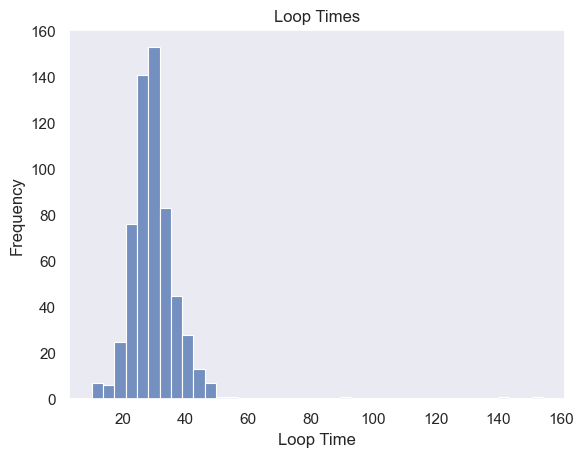

In [611]:
# create a histogram of the loop times
import seaborn as sns, matplotlib.pyplot as plt
sns.histplot(loop_times, bins=40)
plt.title('Loop Times')
plt.xlabel('Loop Time')
plt.ylabel('Frequency')
plt.show()

In [612]:
# for each bus calculate the average loop time
averages = {}
sum_ = 0
length = 0

for key in times:
    if len(times[key]) == 0: continue
    averages[key] = sum(times[key]) / len(times[key])
    sum_ += sum(times[key])
    length += len(times[key])

averages

{4881: 33.40625,
 7180: 33.64074074074074,
 9421: 32.49583333333333,
 11195: 33.25895833333334,
 4851: 28.5,
 13214: 30.016379310344828,
 13210: 27.448484848484842,
 15188: 26.637254901960787,
 4893: 29.524561403508773,
 9418: 28.88229166666667,
 4855: 28.080701754385963,
 4864: 28.65611111111111,
 4856: 27.42333333333333,
 4895: 26.396666666666665,
 4862: 30.160810810810812,
 15186: 30.95539215686274,
 4875: 28.479166666666668,
 4890: 29.18738738738739,
 17625: 30.326775956284163,
 4873: 28.63392857142858,
 4876: 30.192105263157895,
 4877: 28.530392156862746,
 11197: 29.185897435897438}

In [613]:
sum_ / length

30.00246179966045

In [614]:
# for each bus count the number of times the measurement jumps from 0 to something not equal to 0
# make a dictionary for each bus and a list with all the times

times = {}

for bus_id in dfs[route]['bus_id'].unique():
    data_bus = dfs[route][dfs[route]['bus_id'] == bus_id]

    data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
    data_bus = data_bus.sort_values(by='timestamp')

    times[bus_id] = []

    for i in range(1, len(data_bus)):
        value = data_bus.iloc[i]['time_waiting']
        before = data_bus.iloc[i-1]['time_waiting']
        timestamp = data_bus.iloc[i]['timestamp']

        if before == 0 and value > 0:
            times[bus_id].append([timestamp, value / 60])

# get the times from all the buses
wait_times = []

for key, value in times.items():
    wait_times.extend(value)
wait_times

C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['timestamp'] = pd.to_datetime(data_bus['timestamp'])
C:\Users\akash\AppData\Local\Temp\ipykernel_25436\2851424935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

[[Timestamp('2024-10-31 14:25:32'), 1.0166666666666666],
 [Timestamp('2024-10-31 14:27:03'), 1.5333333333333334],
 [Timestamp('2024-10-31 14:30:06'), 1.0166666666666666],
 [Timestamp('2024-10-31 14:36:44'), 2.033333333333333],
 [Timestamp('2024-10-31 14:39:47'), 1.5333333333333334],
 [Timestamp('2024-10-31 14:44:22'), 1.5166666666666666],
 [Timestamp('2024-10-31 14:49:58'), 0.5],
 [Timestamp('2024-10-31 14:52:00'), 0.5166666666666667],
 [Timestamp('2024-10-31 14:53:01'), 3.566666666666667],
 [Timestamp('2024-10-31 14:59:08'), 1.0166666666666666],
 [Timestamp('2024-10-31 15:00:39'), 1.5333333333333334],
 [Timestamp('2024-10-31 15:04:13'), 1.0333333333333334],
 [Timestamp('2024-10-31 15:10:21'), 1.5166666666666666],
 [Timestamp('2024-10-31 15:13:24'), 2.55],
 [Timestamp('2024-10-31 15:21:02'), 2.05],
 [Timestamp('2024-10-31 15:27:10'), 1.0166666666666666],
 [Timestamp('2024-10-31 15:29:42'), 5.616666666666666],
 [Timestamp('2024-10-31 15:37:52'), 1.5333333333333334],
 [Timestamp('2024-10

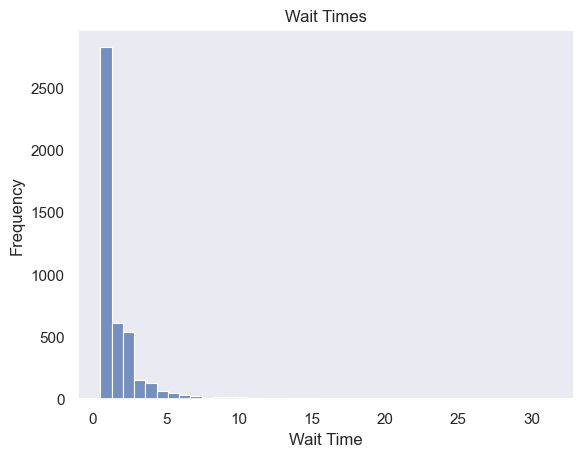

In [615]:
# create a histogram of the loop times
import seaborn as sns, matplotlib.pyplot as plt
sns.histplot([x[1] for x in wait_times], bins=40)
plt.title('Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

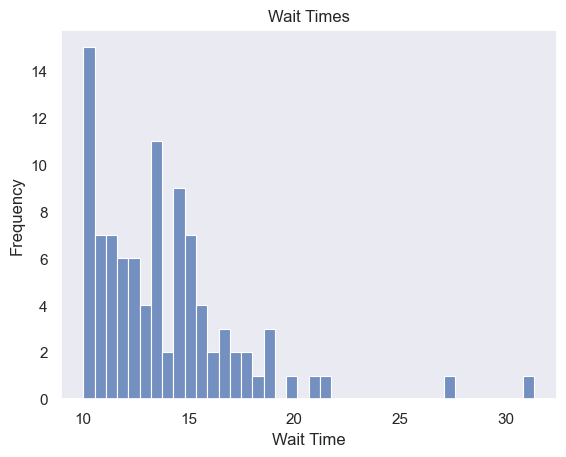

In [616]:
# only graph the data above 2.5 minutes
wait_times_lim = [x[1] for x in wait_times if x[1] > 10]
sns.histplot(wait_times_lim, bins=40)
plt.title('Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

In [617]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming wait_times is a list of tuples (timestamp, wait time)
times = [x[0].hour + x[0].minute / 60 + x[0].second / 3600 for x in wait_times]
wait_times_arr = [x[1] for x in wait_times]


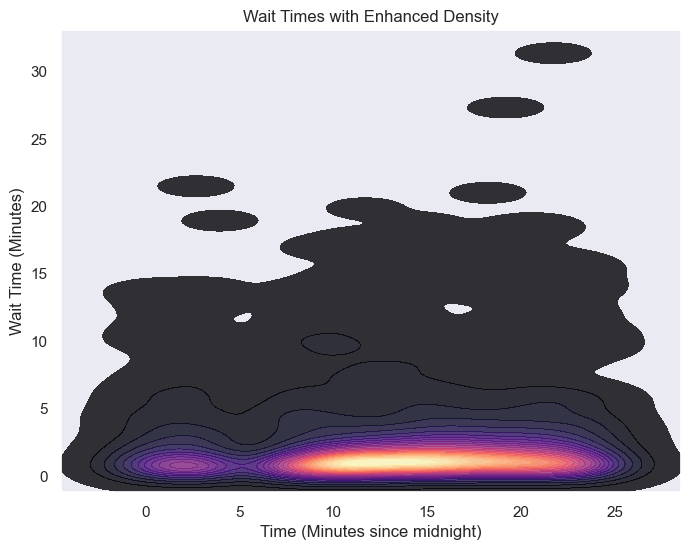

In [618]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create density scatter plot with brighter colormap and contours
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=times, y=wait_times_arr, 
    cmap="magma",  # Brighter colormap
    fill=True, 
    alpha=0.8,       # Increase transparency
    levels=25,       # Add fewer levels for contrast
    thresh=0.001      # Control minimum threshold for visualization
)

plt.title('Wait Times with Enhanced Density')
plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.show()


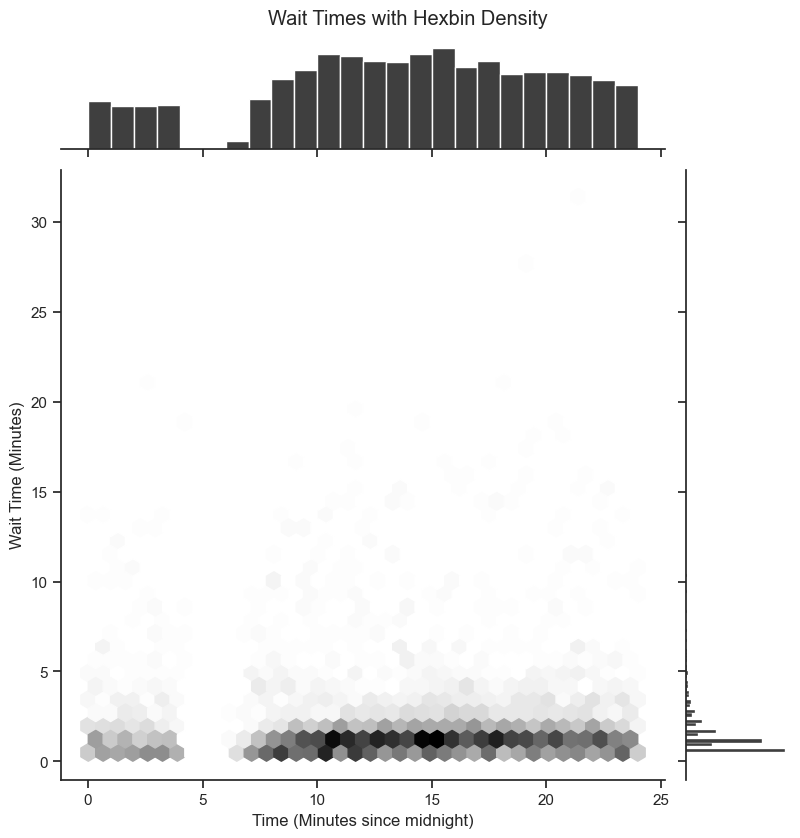

In [619]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming times and wait_times_arr are already calculated
sns.set_theme(style="ticks")

# Create the hexbin joint plot
joint_plot = sns.jointplot(
    x=times,
    y=wait_times_arr,
    kind="hex",
    color="black",  # Choose a color for the hexagons
    height=8,  # Size of the plot,
    palette="crest"  # Choose a color palette for the hexagons
)

# Access the underlying matplotlib figure
fig = joint_plot.fig
fig.patch.set_alpha(0)  # Set the figure's background to transparent

# Make the axes background transparent
for ax in joint_plot.fig.axes:
    ax.patch.set_alpha(0)

# Adjust labels and title
plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.suptitle("Wait Times with Hexbin Density", y=1.02)  # Adjust the title position

plt.show()



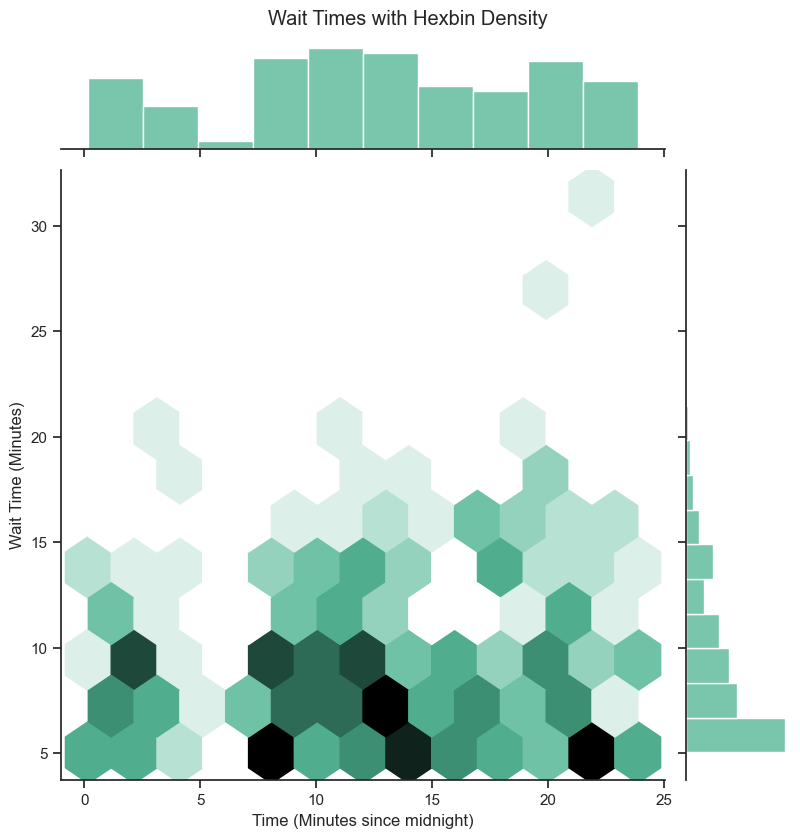

In [620]:
# only plot wait times above 5 minutes
times_lim = []
wait_times_arr_lim = []

for i in range(len(wait_times)):
    if wait_times[i][1] > 5:
        times_lim.append(times[i])
        wait_times_arr_lim.append(wait_times[i][1])

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming times and wait_times_arr are already calculated
sns.set_theme(style="ticks")

# Create the hexbin joint plot
sns.jointplot(
    x=times_lim,
    y=wait_times_arr_lim,
    kind="hex",
    color="#4CB391",  # Choose a color for the hexagons
    height=8  # Size of the plot,
)

plt.xlabel('Time (Minutes since midnight)')
plt.ylabel('Wait Time (Minutes)')
plt.suptitle("Wait Times with Hexbin Density", y=1.02)  # Adjust the title position
plt.show()


In [621]:
# print average bus stop time
sum_ = 0
length = 0

for key in wait_times_arr:
    sum_ += key
    length += 1

average = round(sum_ / length, 2)
average

1.83

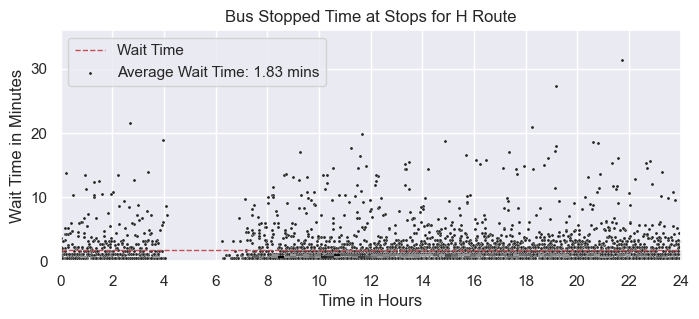

In [622]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `times` and `wait_times_arr` are already calculated
sns.set_theme(style="dark")

# Create the figure and axis
f, ax = plt.subplots(figsize=(8, 3))

# add average to chart
plt.axhline(average, color='r', linestyle='dashed', linewidth=1)

# Draw the scatterplot
sns.scatterplot(
    x=times,
    y=wait_times_arr,
    s=5,                # Small size for scatter points
    color=".15",        # Dark gray color for points
    ax=ax
)

# Draw the histogram (2D histogram with colormap)
sns.histplot(
    x=times,
    y=wait_times_arr,
    bins=100,            # Number of bins for the 2D histogram
    pthresh=0.6,        # Threshold for transparency
    cmap="Greys",        # Colormap for the 2D histogram
    ax=ax
)

# Set labels and title
ax.set_xlabel('Time in Hours')
ax.set_ylabel('Wait Time in Minutes')
ax.set_title(f"Bus Stopped Time at Stops for {route.split('_')[0]} Route")

# Set major ticks for x and y axes
ax.set_xticks(range(0, 25, 2))  # Every 60 minutes on x-axis
ax.set_yticks(range(0, int(max(wait_times_arr)) + 10, 10))  # Every 10 minutes on y-axis

# Enable gridlines for better visualization
ax.grid(True)

# Set the limits for the plot
plt.xlim(0, 24)
plt.ylim(0, 36)


# add legend 
plt.legend(['Wait Time', f'Average Wait Time: {average} mins'], loc='upper left')

plt.savefig(f'graphs/{route.split(".")[0]}_stopped.png')
plt.show()